<a href="https://colab.research.google.com/github/Apollo9999/Wave2WEBHACK/blob/main/EDA/Kabini.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Problem Statement 
##### Important to understand Problem Statement as EDA depends on what you are trying to solve or find.  (should sync EDA with respect to problem)

Developing a predictive model that estimates reservoir water availability atleast 1-3 months in advance using hydro-meteorological parameters and reservoir water level data.

Hydrometeorology is a branch of meteorology and hydrology that studies the transfer of water and energy between the land surface and the lower atmosphere.

What are various Hydro-meteorological parameters?
- Air Temperature
- Rainfall
- Windspeed or direction
- cloudness
- Humidity
- River flow
- Flood Statistics

In [ ]:
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
!ls '/content/gdrive/My Drive/Wave2web/'

'2019-20 Agri excel.xlsx'
'District-wise Depth to water Level and Distribution of Percentage of Wells for the Period of Premonsoon, 2018 in Karnataka (2).xlsx'
'DIST-WISE FRQ TEALE OF MAY2019 for website.xlsx.xlsx'
 GroundwaterLevelSpatialDataProject-master.zip
 Harangi.csv
 Hemavathi.csv
 kabini.csv
 KRS.csv
'_Preparation for Concept Note.docx'
'rainfall-data-for-karnataka_2008-2018 (4).xls'
 rainfall_vs_ksr.csv


In [ ]:
kabini = pd.read_csv('/content/gdrive/My Drive/Wave2web/kabini.csv')
harangi = pd.read_csv('/content/gdrive/My Drive/Wave2web/Harangi.csv')
hemavathi = pd.read_csv('/content/gdrive/My Drive/Wave2web/Hemavathi.csv')
krs = pd.read_csv('/content/gdrive/My Drive/Wave2web/KRS.csv')

- All the datasets have 3300+ records and same number of colums.
- Column names are same

In [ ]:
print("KRS : ", krs.shape)
print("Hemavathi : ", hemavathi.shape)
print("Kabini : ", kabini.shape)
print("Harangi :", harangi.shape)

KRS :  (3313, 10)
Hemavathi :  (3314, 10)
Kabini :  (3314, 10)
Harangi : (3321, 10)


In [ ]:
print(krs.columns.tolist())
print(harangi.columns.tolist())
print(kabini.columns.tolist())
print(hemavathi.columns.tolist())

['SL_NO', 'RESERVOIR', 'YEAR', 'WEEK_NO', 'FLOW_DATE', 'PRESENT_STORAGE_TMC', 'RES_LEVEL_FT', 'INFLOW_CUSECS', 'OUTFLOW_CUECS', 'UNIQUE_KEY']
['SL_NO', 'RESERVOIR', 'YEAR', 'WEEK_NO', 'FLOW_DATE', 'PRESENT_STORAGE_TMC', 'RES_LEVEL_FT', 'INFLOW_CUSECS', 'OUTFLOW_CUECS', 'UNIQUE_KEY']
['SL_NO', 'RESERVOIR', 'YEAR', 'WEEK_NO', 'FLOW_DATE', 'PRESENT_STORAGE_TMC', 'RES_LEVEL_FT', 'INFLOW_CUSECS', 'OUTFLOW_CUECS', 'UNIQUE_KEY']
['SL_NO', 'RESERVOIR', 'YEAR', 'WEEK_NO', 'FLOW_DATE', 'PRESENT_STORAGE_TMC', 'RES_LEVEL_FT', 'INFLOW_CUSECS', 'OUTFLOW_CUECS', 'UNIQUE_KEY']


In [ ]:
krs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3313 entries, 0 to 3312
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3313 non-null   int64  
 1   RESERVOIR            3313 non-null   object 
 2   YEAR                 3313 non-null   int64  
 3   WEEK_NO              3313 non-null   int64  
 4   FLOW_DATE            3313 non-null   object 
 5   PRESENT_STORAGE_TMC  3313 non-null   float64
 6   RES_LEVEL_FT         3313 non-null   object 
 7   INFLOW_CUSECS        3313 non-null   object 
 8   OUTFLOW_CUECS        3313 non-null   int64  
 9   UNIQUE_KEY           3313 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 259.0+ KB


In [ ]:
hemavathi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3314 non-null   int64  
 1   RESERVOIR            3314 non-null   object 
 2   YEAR                 3314 non-null   int64  
 3   WEEK_NO              3314 non-null   int64  
 4   FLOW_DATE            3314 non-null   object 
 5   PRESENT_STORAGE_TMC  3314 non-null   float64
 6   RES_LEVEL_FT         3314 non-null   object 
 7   INFLOW_CUSECS        3314 non-null   object 
 8   OUTFLOW_CUECS        3314 non-null   float64
 9   UNIQUE_KEY           3314 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 259.0+ KB


In [ ]:
kabini.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3314 entries, 0 to 3313
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3314 non-null   int64  
 1   RESERVOIR            3314 non-null   object 
 2   YEAR                 3314 non-null   int64  
 3   WEEK_NO              3314 non-null   int64  
 4   FLOW_DATE            3314 non-null   object 
 5   PRESENT_STORAGE_TMC  3314 non-null   float64
 6   RES_LEVEL_FT         3314 non-null   object 
 7   INFLOW_CUSECS        3314 non-null   object 
 8   OUTFLOW_CUECS        3314 non-null   int64  
 9   UNIQUE_KEY           3314 non-null   object 
dtypes: float64(1), int64(4), object(5)
memory usage: 259.0+ KB


In [ ]:
harangi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3321 entries, 0 to 3320
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SL_NO                3321 non-null   int64  
 1   RESERVOIR            3321 non-null   object 
 2   YEAR                 3321 non-null   int64  
 3   WEEK_NO              3321 non-null   int64  
 4   FLOW_DATE            3321 non-null   object 
 5   PRESENT_STORAGE_TMC  3321 non-null   float64
 6   RES_LEVEL_FT         3321 non-null   object 
 7   INFLOW_CUSECS        3321 non-null   object 
 8   OUTFLOW_CUECS        3321 non-null   object 
 9   UNIQUE_KEY           3321 non-null   object 
dtypes: float64(1), int64(3), object(6)
memory usage: 259.6+ KB


FLOW_DATE, RES_LEVEL_FT, INFLOW_CUECS are object datatyp in all the 4 datasets

OUTFLOW_CUECS is also object in harangi dataset

Let us first change it for kabini data

In [ ]:
kabini.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,226,Kabini,2011,3,2011-01-21,16.56,2279.14,252,50,KABINI-2011-01-21
1,227,Kabini,2011,3,2011-01-20,16.54,2279.12,318,50,KABINI-2011-01-20
2,312,Kabini,2011,4,2011-01-22,16.57,2279.16,252,50,KABINI-2011-01-22
3,313,Kabini,2011,4,2011-01-23,16.58,2279.18,252,50,KABINI-2011-01-23
4,314,Kabini,2011,4,2011-01-24,16.59,2279.20,252,50,KABINI-2011-01-24


In [ ]:
kabini.FLOW_DATE = pd.to_datetime(kabini.FLOW_DATE)

In [ ]:
# convert object to numeric
kabini['INFLOW_CUSECS'] = pd.to_numeric(kabini.INFLOW_CUSECS, errors='coerce')

In [ ]:
kabini['RES_LEVEL_FT'] = pd.to_numeric(kabini.RES_LEVEL_FT, errors='coerce')

In [ ]:
kabini.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
0,226,Kabini,2011,3,2011-01-21,16.56,2279.14,252.0,50,KABINI-2011-01-21
1,227,Kabini,2011,3,2011-01-20,16.54,2279.12,318.0,50,KABINI-2011-01-20
2,312,Kabini,2011,4,2011-01-22,16.57,2279.16,252.0,50,KABINI-2011-01-22
3,313,Kabini,2011,4,2011-01-23,16.58,2279.18,252.0,50,KABINI-2011-01-23
4,314,Kabini,2011,4,2011-01-24,16.59,2279.20,252.0,50,KABINI-2011-01-24


### Meteorological Seasons
According to the meteorological definition, the seasons begin on the first day of the months that include the equinoxes and solstices. In the Northern Hemisphere, for example,

- spring runs from March 1 to May 31;
- summer runs from June 1 to August 31;
- fall (autumn) runs from September 1 to November 30; and
- winter runs from December 1 to February 28 (February 29 in a leap year).

![Seasons](https://c.tadst.com/gfx/900x506/equinoxes-and-solstice.png?1)


we can use months to identify trend  - 3 months a season

or we can use weeks also to identify the trend - 13 weeks a season

In [ ]:
kabini.describe()

,SL_NO,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS
count,3314.000000,3314.000000,3314.000000,3314.000000,3313.000000,3313.000000,3314.000000
mean,22281.950513,2015.734158,27.939046,12.814357,2271.455946,3113.368156,2962.761014
std,12712.048863,2.824518,14.815657,4.611703,13.953381,7420.683351,7123.188134
min,226.000000,2010.000000,1.000000,0.000000,2241.680000,10.000000,0.000000
25%,11078.250000,2014.000000,15.000000,9.330000,2264.920000,171.000000,500.000000
50%,22495.500000,2016.000000,29.000000,13.490000,2273.600000,617.000000,1050.000000
75%,33280.750000,2018.000000,41.000000,16.770000,2279.590000,2579.000000,2290.000000
max,43926.000000,2020.000000,52.000000,19.520000,2837.200000,112511.000000,121000.000000


- present_storage_tmc, res_level_ft, inflow_cusecs are ok.
- ouflow cusecs maximum value is 121000 (need to be analyzed further)

https://www.deccanherald.com/state/karnataka-districts/outflow-increased-to-60000-cusecs-from-kabini-870533.html

maximum storage capacity is - 19.52 TMC

it can store upto - 2284 ft.

max outflow was 56,600 cusec 

It is clear that some human error is there.


In [ ]:
kabini.loc[kabini['OUTFLOW_CUECS'] == 121000]


,SL_NO,RESERVOIR,YEAR,WEEK_NO,FLOW_DATE,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
1636,22223,Kabini,2019,32,2019-08-11,13.3,2280.18,104084.0,121000,KABINI-2019-08-11


https://weather.com/en-IN/india/news/news/2020-01-08-top-5-biggest-floods-affect-india-2019

Floods at above date. but there is no proof that kabini outflow is that much.


In [ ]:
fig = px.box(x = kabini["OUTFLOW_CUECS"] )
fig.show()

lot of outlier points are there.



2016    366
2019    365
2017    365
2015    365
2018    365
2014    364
2011    358
2020    333
2013    216
2012    215
2010      2
Name: YEAR, dtype: int64


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning:

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



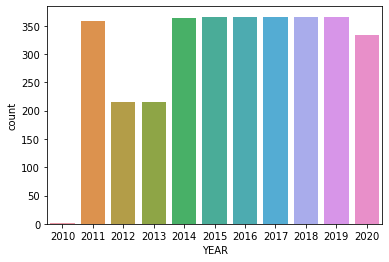

In [ ]:
print(kabini["YEAR"].value_counts())
sns.countplot(kabini["YEAR"])


Only 2 months data and few less records for 2012 and 2013 for kabini

In [ ]:
kabini_indexed = kabini.set_index('FLOW_DATE')

In [ ]:
kabini_indexed.head()

,SL_NO,RESERVOIR,YEAR,WEEK_NO,PRESENT_STORAGE_TMC,RES_LEVEL_FT,INFLOW_CUSECS,OUTFLOW_CUECS,UNIQUE_KEY
FLOW_DATE,,,,,,,,,
2011-01-21,226,Kabini,2011,3,16.56,2279.14,252.0,50,KABINI-2011-01-21
2011-01-20,227,Kabini,2011,3,16.54,2279.12,318.0,50,KABINI-2011-01-20
2011-01-22,312,Kabini,2011,4,16.57,2279.16,252.0,50,KABINI-2011-01-22
2011-01-23,313,Kabini,2011,4,16.58,2279.18,252.0,50,KABINI-2011-01-23
2011-01-24,314,Kabini,2011,4,16.59,2279.20,252.0,50,KABINI-2011-01-24


In [ ]:
fig = px.line(data_frame = kabini, x = 'FLOW_DATE', y='INFLOW_CUSECS')

fig.update_xaxes(rangeslider_visible=True)
fig.show()

In [ ]:
kabini_indexed['year'] = [x.year for x in kabini_indexed.index]

In [ ]:
fig = px.line(data_frame=kabini_indexed, y='INFLOW_CUSECS', color='year')
fig.show()

In [ ]:
weeklykabini = kabini_indexed.groupby(['year','WEEK_NO']).mean()

In [ ]:
weeklykabini.shape

(473, 6)

In [ ]:
weeklykabini.head()

SL_NO    YEAR  ...  INFLOW_CUSECS  OUTFLOW_CUECS
year WEEK_NO                   ...                              
2010 39       13063.0  2010.0  ...    1007.000000    2490.000000
     52       13232.0  2010.0  ...     800.000000    2490.000000
2011 3          226.5  2011.0  ...     285.000000      50.000000
     4          315.0  2011.0  ...     229.285714     168.714286
     5          406.0  2011.0  ...     134.714286     665.142857

[5 rows x 6 columns]

In [ ]:
fig = px.line(data_frame=weeklykabini, y='INFLOW_CUSECS', color='YEAR')
fig.show()

In [ ]:
fig = px.line(data_frame=weeklykabini, y='OUTFLOW_CUECS', color='YEAR')
fig.show()

In [ ]:
fig = px.line(data_frame=weeklykabini, y='RES_LEVEL_FT', color='YEAR')
fig.show()

In [ ]:
fig = px.line(data_frame=weeklykabini, y='PRESENT_STORAGE_TMC', color='YEAR')
fig.show()

storage is decreasing and as soon as monsoon is coming storage is increasing and started declining from 48th week like that
